# Task 4.10 Part D Coding Etiquette and Excel Reporting

Contents

1. Import libraries


2. Import latest data set


3. Data insights and charts

     3a. Customer profile by region
     
     3b. Customer Spending by frequency of orders
     
     3c. Demand for each department by region
     
     3d. Department by price range
     
     3e. Customer loyalty by price range of products


4. Additional insights
     

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Import latest dataset Instacart_final
# Turn project folder path into a string

path = r'/Users/giorjeanmutuc/Instacart Basket Analysis'

In [3]:
# import Instacart_final3.pkl

df_final = pd.read_pickle(r'/Users/giorjeanmutuc/Instacart Basket Analysis/02 Data/Prepared Data/Instacart_final3.pkl')

In [4]:
# remove column limit to enable checking the data

pd.options.display.max_columns = None

In [10]:
df_final.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,activity,busiest_period_of_day,max_order,loyalty_flag,avg_order,spending_flag,ord_med_freq,order_freq_flag,gender,state,age,date_joined,dependents,fam_status,income,_merge,region,exclusion_flag,age_range,income_bracket,parental_status,customer_profile
0,2539329,1,1,2,8,0.0,196,1,0,Soda,77,7,9.0,Mid-range product,Regular days,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Regular customer,31-40,<50000,Parent,Young parent
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,Mid-range product,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Regular customer,31-40,<50000,Parent,Young parent
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,Mid-range product,Slowest days,Most orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Regular customer,31-40,<50000,Parent,Young parent
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,Mid-range product,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Regular customer,31-40,<50000,Parent,Young parent
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,Mid-range product,Slowest days,Most orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Regular customer,31-40,<50000,Parent,Young parent


In [7]:
df_final.shape

(30964564, 36)

# 3. Data insights and charts

   # 3.a Customer profile by region

In [5]:
# Crosstab customer_profile and region

xcustomer_region = pd.crosstab(df_final['customer_profile'], df_final['region'], dropna = False)

In [11]:
xcustomer_region

region,Midwest,Northeast,South,West
customer_profile,,,,
Old parent,989030,743841,1357434,1047798
Other,3789235,2843025,5372549,4138500
Senior Shopper,986600,762516,1416691,1102933
Single shopper,485695,344228,684034,521345
Young parent,1010953,771075,1480431,1116651


Text(0, 0.5, 'Customers(millions)')

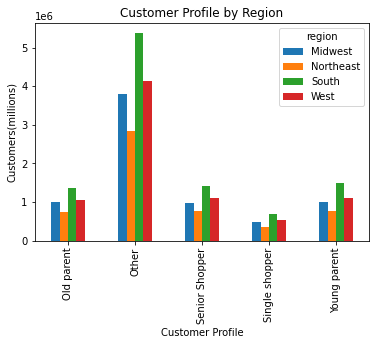

In [7]:
# Create bar chart for xcustomer_region

bar_cust_region = xcustomer_region.plot.bar(title = 'Customer Profile by Region')

plt.xlabel('Customer Profile')
plt.ylabel('Customers(millions)')


In [8]:
# To export bar_cust_region image file

bar_cust_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_cust_region.png'), bbox_inches = 'tight')

# 3b. Customer Spending by frequency of orders

In [56]:
# Crosstab spending_flag and order_freq_flag

xspend_freq = pd.crosstab(df_final['spending_flag'], df_final['order_freq_flag'], dropna = False)

In [39]:
xspend_freq

order_freq_flag,Frequent customer,Non-frequent customer,Regular customer
spending_flag,,,
High spender,438053,40227,125145
Low spender,21770841,2147190,6443108


/var/folders/hp/8pw7bj8j4cn95z6t9ph44m480000gn/T/ipykernel_1559/3517090145.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


[Text(0, 0.0, '0'),
 Text(0, 5000000.0, '5,000,000'),
 Text(0, 10000000.0, '10,000,000'),
 Text(0, 15000000.0, '15,000,000'),
 Text(0, 20000000.0, '20,000,000'),
 Text(0, 25000000.0, '25,000,000')]

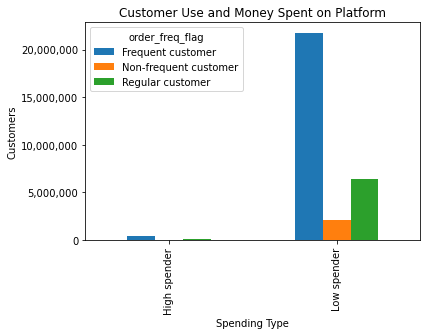

In [57]:
# Creat bar chart for xspend_freq

bar_xspend_freq = xspend_freq.plot.bar(title = 'Customer Use and Money Spent on Platform')

plt.xlabel('Spending Type')
plt.ylabel('Customers')

# after plotting the data, format the labels
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

In [58]:
# To export bar_xspend_freq image file

bar_xspend_freq.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_xspend_freq.png'),bbox_inches = 'tight')

# 3c. Demand for each department by region

In [5]:
# Crosstab department_id and region

xdeptid_region = pd.crosstab(df_final['department_id'], df_final['region'], dropna = False)

In [19]:
xdeptid_region

region,Midwest,Northeast,South,West
department_id,,,,
1,498225,370436,709906,543164
2,7983,6268,11579,8581
3,261753,199300,371620,288155
4,2134115,1593004,3027476,2324678
5,34043,25017,48813,36754
6,60666,44678,84649,65998
7,598979,462929,859419,650574
8,21358,17734,29909,24059
9,193463,143817,272813,212043


/var/folders/hp/8pw7bj8j4cn95z6t9ph44m480000gn/T/ipykernel_1013/4091388965.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


[Text(0, 0.0, '0'),
 Text(0, 500000.0, '500,000'),
 Text(0, 1000000.0, '1,000,000'),
 Text(0, 1500000.0, '1,500,000'),
 Text(0, 2000000.0, '2,000,000'),
 Text(0, 2500000.0, '2,500,000'),
 Text(0, 3000000.0, '3,000,000'),
 Text(0, 3500000.0, '3,500,000')]

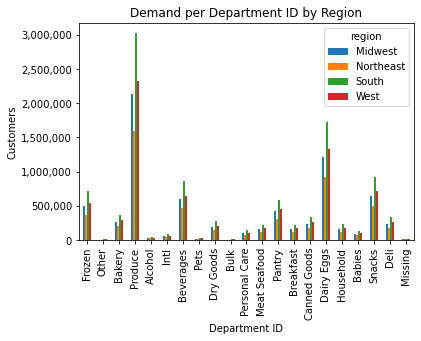

In [6]:
# Create line chart for xdepid_region

bar_xdeptid_region = xdeptid_region.plot.bar(title = 'Demand per Department ID by Region')

plt.xlabel('Department ID')
plt.ylabel('Customers')


plt.xticks(range(0,21), ['Frozen','Other','Bakery','Produce','Alcohol','Intl','Beverages','Pets','Dry Goods','Bulk','Personal Care','Meat Seafood','Pantry','Breakfast','Canned Goods','Dairy Eggs','Household','Babies','Snacks','Deli','Missing'])

# after plotting the data, format the labels
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


In [7]:
# To export bar_xdeptid_region image file

bar_xdeptid_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_xdeptid_region.png'),bbox_inches = 'tight', dpi = 100)

In [17]:
# Crosstab 'region' and order_freq_flag

xregion_freq = pd.crosstab(df_final['region'], df_final['order_freq_flag'], dropna = False)

In [7]:
xregion_freq

order_freq_flag,Frequent customer,Non-frequent customer,Regular customer
region,,,
Midwest,5166753,523619,1571141
Northeast,3919693,379091,1165901
South,7407676,732373,2171090
West,5714772,552334,1660121


/var/folders/hp/8pw7bj8j4cn95z6t9ph44m480000gn/T/ipykernel_1013/3899894600.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


[Text(0, 0.0, '0'),
 Text(0, 1000000.0, '1,000,000'),
 Text(0, 2000000.0, '2,000,000'),
 Text(0, 3000000.0, '3,000,000'),
 Text(0, 4000000.0, '4,000,000'),
 Text(0, 5000000.0, '5,000,000'),
 Text(0, 6000000.0, '6,000,000'),
 Text(0, 7000000.0, '7,000,000'),
 Text(0, 8000000.0, '8,000,000')]

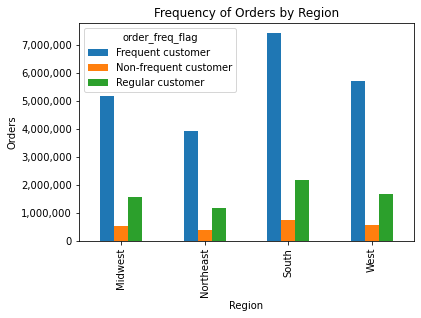

In [18]:
# Create bar chart for xregion_freq

bar_xregion_freq = xregion_freq.plot.bar(title = 'Frequency of Orders by Region')

plt.xlabel('Region')
plt.ylabel('Orders')

# after plotting the data, format the labels
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

In [19]:
# To export bar_xregion_freq image file

bar_xregion_freq.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_xregion_freq.png'),bbox_inches = 'tight')

In [8]:
# Crosstab department_id and order_freq_flag

xdeptid_freq = pd.crosstab(df_final['department_id'], df_final['order_freq_flag'], dropna = False)

In [25]:
xdeptid_freq

order_freq_flag,Frequent customer,Non-frequent customer,Regular customer
department_id,,,
1,1442717,173184,505830
2,24708,2514,7189
3,807009,77236,236583
4,6652890,590675,1835708
5,105534,9751,29342
6,179643,19639,56709
7,1837479,186820,547602
8,62138,7407,23515
9,562483,66331,193322


/var/folders/hp/8pw7bj8j4cn95z6t9ph44m480000gn/T/ipykernel_1013/4015784726.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


[Text(0, 0.0, '0'),
 Text(0, 1000000.0, '1,000,000'),
 Text(0, 2000000.0, '2,000,000'),
 Text(0, 3000000.0, '3,000,000'),
 Text(0, 4000000.0, '4,000,000'),
 Text(0, 5000000.0, '5,000,000'),
 Text(0, 6000000.0, '6,000,000'),
 Text(0, 7000000.0, '7,000,000')]

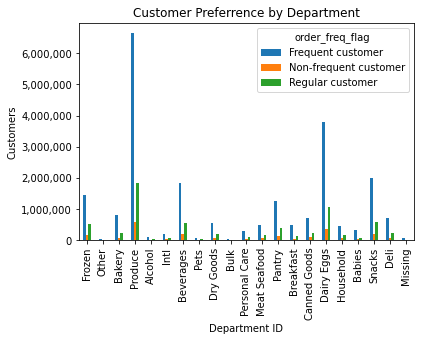

In [9]:
# Create bar chart for xdeptid_freq

bar_xdeptid_freq = xdeptid_freq.plot.bar(title = 'Customer Preferrence by Department')

plt.xlabel('Department ID')
plt.ylabel('Customers')
plt.xticks(range(0,21), ['Frozen','Other','Bakery','Produce','Alcohol','Intl','Beverages','Pets','Dry Goods','Bulk','Personal Care','Meat Seafood','Pantry','Breakfast','Canned Goods','Dairy Eggs','Household','Babies','Snacks','Deli','Missing'])

# after plotting the data, format the labels
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])



In [10]:
# To export bar_xdeptid_freq image file

bar_xdeptid_freq.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_xdeptid_freq.png'),bbox_inches = 'tight')

In [24]:
# Find count of orders made per department

dep_count = df_final.groupby('department_id').agg({'order_number': ['count']})

In [49]:
dep_count

,order_number
,count
department_id,
1,2121731
2,34411
3,1120828
4,9079273
5,144627
6,255991
7,2571901
8,93060


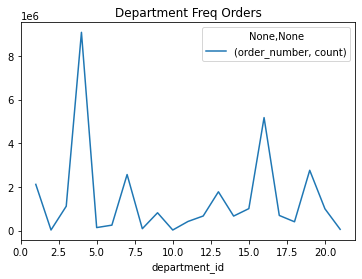

In [42]:
# Create line chart for line_dep_count

line_dep_count = dep_count.plot.line(title = 'Department Freq Orders')

# 3d. Department by price range

In [11]:
# Crosstab department_id and price_range_loc

xdeptid_price = pd.crosstab(df_final['department_id'], df_final['price_range_loc'], dropna = False)


In [48]:
xdeptid_price

price_range_loc,High-range product,Low-range product,Mid-range product
department_id,,,
1,0,647617,1474114
2,0,15259,19152
3,0,274986,845842
4,0,2585708,6493565
5,0,33046,111581
6,0,73203,182788
7,0,814697,1757204
8,0,28165,64895
9,0,284346,537790


/var/folders/hp/8pw7bj8j4cn95z6t9ph44m480000gn/T/ipykernel_1013/3637084873.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


[Text(0, 0.0, '0'),
 Text(0, 1000000.0, '1,000,000'),
 Text(0, 2000000.0, '2,000,000'),
 Text(0, 3000000.0, '3,000,000'),
 Text(0, 4000000.0, '4,000,000'),
 Text(0, 5000000.0, '5,000,000'),
 Text(0, 6000000.0, '6,000,000'),
 Text(0, 7000000.0, '7,000,000')]

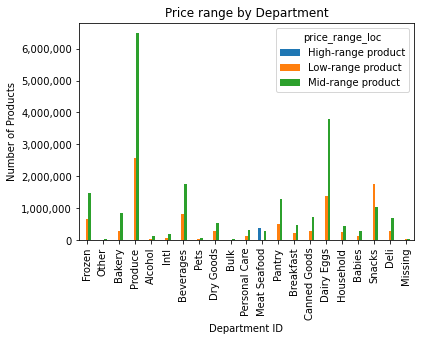

In [12]:
# Create bar chart for xdepid_price

bar_xdeptid_price = xdeptid_price.plot.bar(title = 'Price range by Department')


plt.xlabel('Department ID')
plt.ylabel('Number of Products')
plt.xticks(range(0,21), ['Frozen','Other','Bakery','Produce','Alcohol','Intl','Beverages','Pets','Dry Goods','Bulk','Personal Care','Meat Seafood','Pantry','Breakfast','Canned Goods','Dairy Eggs','Household','Babies','Snacks','Deli','Missing'])

# after plotting the data, format the labels
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])



In [13]:
# To export bar_xdeptid_price image file

bar_xdeptid_price.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_xdeptid_price.png'),bbox_inches = 'tight')

# 3e. Customer loyalty by price range of products

In [49]:
# Crosstab loyalty_flag and price_range_loc

xloyal_price = pd.crosstab(df_final['loyalty_flag'], df_final['price_range_loc'], dropna = False)

In [50]:
xloyal_price

price_range_loc,High-range product,Low-range product,Mid-range product
loyalty_flag,,,
Loyal customer,119936,3214690,6949467
New customer,65927,1501288,3236480
Regular customer,212090,4958862,10705824


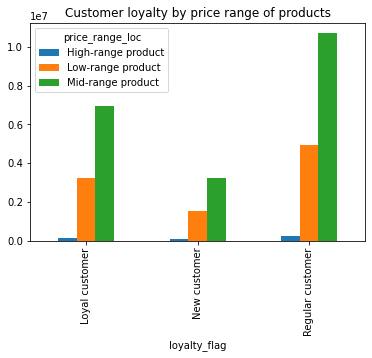

In [72]:
# Create bar chart for xloyal_price

bar_xloyal_price = xloyal_price.plot.bar(title = 'Customer loyalty by price range of products')

In [73]:
# To export line_xdeptid_price image file

bar_xloyal_price.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_xloyal_price.png'))

# 4. Additional insights

In [49]:
# Crosstab 'customer_profile' and order_freq_flag

xcust_freq = pd.crosstab(df_final['customer_profile'], df_final['order_freq_flag'], dropna = False)

In [19]:
xcust_freq

order_freq_flag,Frequent customer,Non-frequent customer,Regular customer
customer_profile,,,
Old parent,3220968,0,917135
Other,10699615,2187417,3256277
Senior Shopper,3320802,0,947938
Single shopper,1576657,0,458645
Young parent,3390852,0,988258


/var/folders/hp/8pw7bj8j4cn95z6t9ph44m480000gn/T/ipykernel_1013/2068156974.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


[Text(0, 0.0, '0'),
 Text(0, 2000000.0, '2,000,000'),
 Text(0, 4000000.0, '4,000,000'),
 Text(0, 6000000.0, '6,000,000'),
 Text(0, 8000000.0, '8,000,000'),
 Text(0, 10000000.0, '10,000,000'),
 Text(0, 12000000.0, '12,000,000')]

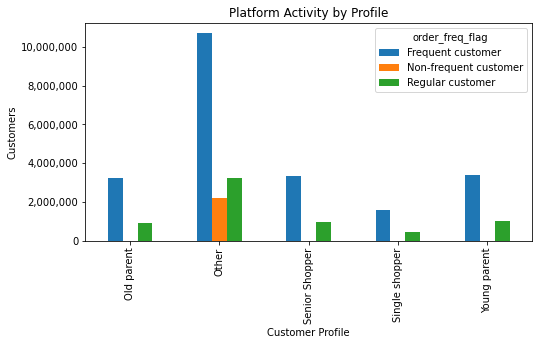

In [55]:
# Create bar chart for xcust_freq

plt.rcParams["figure.figsize"] = (8,4)

bar_xcust_freq = xcust_freq.plot.bar(title = 'Platform Activity by Profile')

plt.xlabel('Customer Profile')
plt.ylabel('Customers')

# after plotting the data, format the labels
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

In [56]:
# To export bar_xcust_freq image file

bar_xcust_freq.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_xcust_freq.png'),bbox_inches = 'tight')

In [27]:
# Crosstab customer_profile and income_bracket

xcust_income = pd.crosstab(df_final['customer_profile'], df_final['income_bracket'], dropna = False)

In [15]:
xcust_income

income_bracket,100000-200000,200001-300000,50000-99999,<50000
customer_profile,,,,
Old parent,3141231,0,996872,0
Other,6985809,254142,6180158,2723200
Senior Shopper,3248002,0,1020738,0
Single shopper,578218,0,1457084,0
Young parent,0,0,3739756,639354


/var/folders/hp/8pw7bj8j4cn95z6t9ph44m480000gn/T/ipykernel_1013/4269308673.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


[Text(0, 0.0, '0'),
 Text(0, 1000000.0, '1,000,000'),
 Text(0, 2000000.0, '2,000,000'),
 Text(0, 3000000.0, '3,000,000'),
 Text(0, 4000000.0, '4,000,000'),
 Text(0, 5000000.0, '5,000,000'),
 Text(0, 6000000.0, '6,000,000'),
 Text(0, 7000000.0, '7,000,000'),
 Text(0, 8000000.0, '8,000,000')]

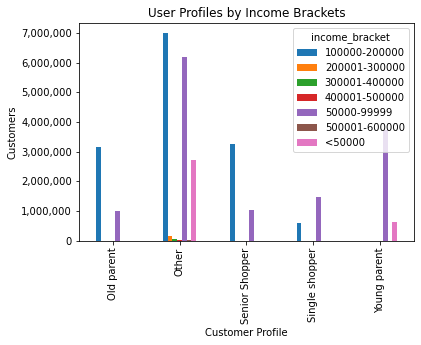

In [30]:
# Create bar chart for xcust_income

bar_xcust_income = xcust_income.plot.bar(title = 'User Profiles by Income Brackets')

plt.xlabel('Customer Profile')
plt.ylabel('Customers')

# after plotting the data, format the labels
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

In [31]:
# To export bar_xcust_income image file

bar_xcust_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_xcust_income.png'),bbox_inches = 'tight')

In [14]:
# Crosstab customer_profile and parental_status

xcust_parent = pd.crosstab(df_final['customer_profile'], df_final['parental_status'], dropna = False)

/var/folders/hp/8pw7bj8j4cn95z6t9ph44m480000gn/T/ipykernel_1013/763969454.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


[Text(0, -2000000.0, '-2,000,000'),
 Text(0, 0.0, '0'),
 Text(0, 2000000.0, '2,000,000'),
 Text(0, 4000000.0, '4,000,000'),
 Text(0, 6000000.0, '6,000,000'),
 Text(0, 8000000.0, '8,000,000'),
 Text(0, 10000000.0, '10,000,000'),
 Text(0, 12000000.0, '12,000,000')]

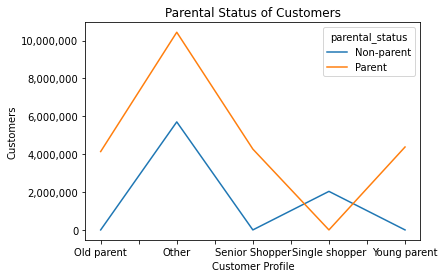

In [15]:
# Create line chart for xcust_parent

line_xcust_parent = xcust_parent.plot.line(title = 'Parental Status of Customers')

plt.xlabel('Customer Profile')
plt.ylabel('Customers')

# after plotting the data, format the labels
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

In [16]:
# To export line_xcust_parent image file

line_xcust_parent.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_xcust_parent.png'),bbox_inches = 'tight')

In [33]:
# Crosstab department_id and customer_profile

xdepid_customer = pd.crosstab(df_final['department_id'], df_final['customer_profile'], dropna = False)

In [21]:
xdepid_customer

customer_profile,Old parent,Other,Senior Shopper,Single shopper,Young parent
department_id,,,,,
1,416841,652485,416403,196545,439457
2,0,34411,0,0,0
3,0,1120828,0,0,0
4,1833663,2588852,1837070,885823,1933865
5,0,144627,0,0,0
6,0,255991,0,0,0
7,492767,828870,486328,229441,534495
8,0,93060,0,0,0
9,0,822136,0,0,0


/var/folders/hp/8pw7bj8j4cn95z6t9ph44m480000gn/T/ipykernel_1013/2997677185.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


[Text(0, 0.0, '0'),
 Text(0, 500000.0, '500,000'),
 Text(0, 1000000.0, '1,000,000'),
 Text(0, 1500000.0, '1,500,000'),
 Text(0, 2000000.0, '2,000,000'),
 Text(0, 2500000.0, '2,500,000'),
 Text(0, 3000000.0, '3,000,000')]

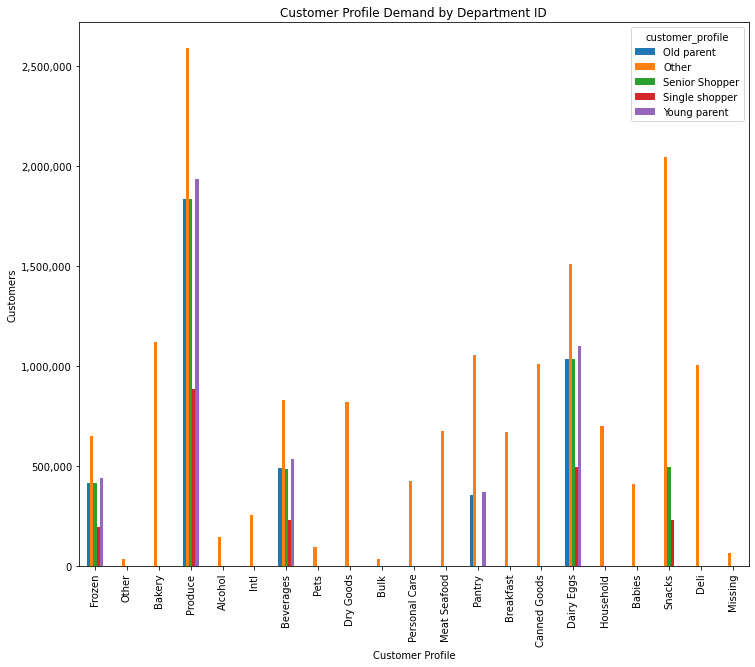

In [45]:
# Create bar chart for xdepid_customer

plt.rcParams["figure.figsize"] = (12,10)

bar_xdepid_customer = xdepid_customer.plot.bar(title = 'Customer Profile Demand by Department ID')

plt.xlabel('Customer Profile')
plt.ylabel('Customers')
plt.xticks(range(0,21), ['Frozen','Other','Bakery','Produce','Alcohol','Intl','Beverages','Pets','Dry Goods','Bulk','Personal Care','Meat Seafood','Pantry','Breakfast','Canned Goods','Dairy Eggs','Household','Babies','Snacks','Deli','Missing'])

# after plotting the data, format the labels
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


In [47]:
# To export line_xdepid_customer image file

bar_xdepid_customer.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_xdepid_customer.png'),bbox_inches = 'tight')

In [20]:
# Crosstab age_range and order_freq_flag

xage_freq = pd.crosstab(df_final['age_range'], df_final['order_freq_flag'], dropna = False)

In [26]:
xage_freq

order_freq_flag,Frequent customer,Non-frequent customer,Regular customer
age_range,,,
20 & under,1043018,104744,306966
21-30,3477441,341446,1030625
31-40,3460272,339387,1044534
41-50,3501870,348819,1017943
51-60,3461706,342368,1030818
61-70,3436722,336506,1006730
71-80,3483938,339753,1023111
81+,343927,34394,107526


/var/folders/hp/8pw7bj8j4cn95z6t9ph44m480000gn/T/ipykernel_1013/1085744060.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


[Text(0, -500000.0, '-500,000'),
 Text(0, 0.0, '0'),
 Text(0, 500000.0, '500,000'),
 Text(0, 1000000.0, '1,000,000'),
 Text(0, 1500000.0, '1,500,000'),
 Text(0, 2000000.0, '2,000,000'),
 Text(0, 2500000.0, '2,500,000'),
 Text(0, 3000000.0, '3,000,000'),
 Text(0, 3500000.0, '3,500,000'),
 Text(0, 4000000.0, '4,000,000')]

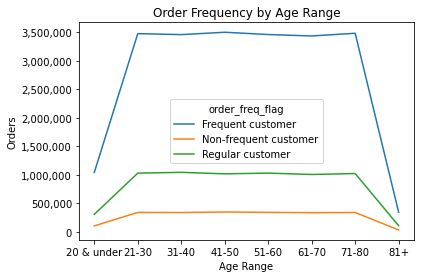

In [21]:
# Create line chart for xage_freq

line_xage_freq = xage_freq.plot.line(title = 'Order Frequency by Age Range')

plt.xlabel('Age Range')
plt.ylabel('Orders')

# after plotting the data, format the labels
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

In [22]:
# To export line_xage_freq image file

line_xage_freq.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_xage_freq.png'),bbox_inches = 'tight')

In [23]:
# Crosstab parental_status and order_freq_flag

xparent_freq = pd.crosstab(df_final['parental_status'], df_final['order_freq_flag'], dropna = False)

In [30]:
xparent_freq

order_freq_flag,Frequent customer,Non-frequent customer,Regular customer
parental_status,,,
Non-parent,5544082,540110,1655489
Parent,16664812,1647307,4912764


/var/folders/hp/8pw7bj8j4cn95z6t9ph44m480000gn/T/ipykernel_1013/1662539590.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


[Text(0, 0.0, '0'),
 Text(0, 2000000.0, '2,000,000'),
 Text(0, 4000000.0, '4,000,000'),
 Text(0, 6000000.0, '6,000,000'),
 Text(0, 8000000.0, '8,000,000'),
 Text(0, 10000000.0, '10,000,000'),
 Text(0, 12000000.0, '12,000,000'),
 Text(0, 14000000.0, '14,000,000'),
 Text(0, 16000000.0, '16,000,000'),
 Text(0, 18000000.0, '18,000,000')]

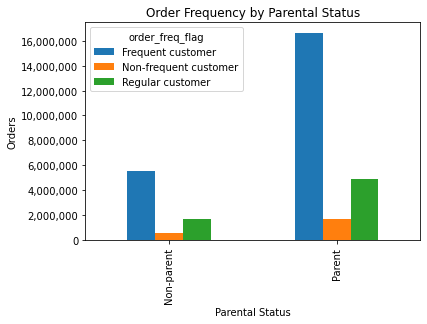

In [24]:
# Create bar chart for xparent_freq

bar_xparent_freq = xparent_freq.plot.bar(title = 'Order Frequency by Parental Status')

plt.xlabel('Parental Status')
plt.ylabel('Orders')

# after plotting the data, format the labels
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

In [25]:
# To export bar_xparent_freq image file

bar_xparent_freq.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_xparent_freq.png'),bbox_inches = 'tight')

/var/folders/hp/8pw7bj8j4cn95z6t9ph44m480000gn/T/ipykernel_1559/659615532.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


[Text(0, 0.0, '0'),
 Text(0, 5000000.0, '5,000,000'),
 Text(0, 10000000.0, '10,000,000'),
 Text(0, 15000000.0, '15,000,000'),
 Text(0, 20000000.0, '20,000,000'),
 Text(0, 25000000.0, '25,000,000'),
 Text(0, 30000000.0, '30,000,000'),
 Text(0, 35000000.0, '35,000,000')]

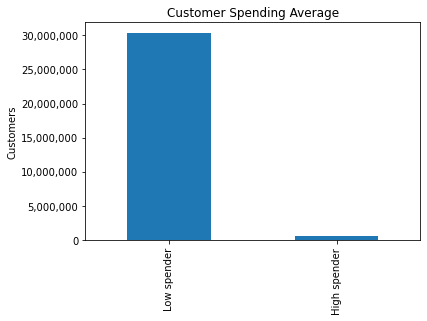

In [72]:
# Create bar chart spending_flag

bar_spending_flag = df_final['spending_flag'].value_counts().plot.bar(title = 'Customer Spending Average')

plt.ylabel('Customers')

# after plotting the data, format the labels
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


In [73]:
# To export bar_spending_flag image file

bar_spending_flag.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_spending_flag.png'),bbox_inches = 'tight')

In [26]:
# Create bar chart price_range

bar_price_range = df_final['price_range'].value_counts().plot.bar(title = 'Customer Loyalty')

KeyError: 'price_range'